In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Regresion lineal simple pero con correccion por RH
df = data = pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/dataset/proceed/merge_pm-maiac-meteo/1000/08-TOT_merge_PM25-MAIAC-Meteo.csv") 
df['AOD_550_HR'] = df['AOD_550'] * (1/(1- (df['humedad']/100)))
df = df.drop(columns = ["estacion_num"], inplace=False)

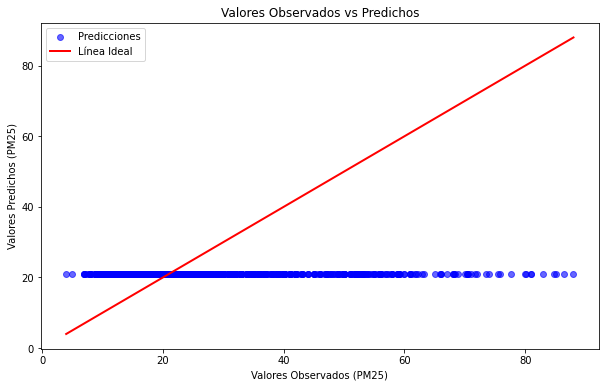

In [12]:
# #Regresion lineal simple pero con correccion por RH
# df = data = pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/dataset/proceed/merge_pm-maiac-meteo/1000/08-TOT_merge_PM25-MAIAC-Meteo.csv") 
# # df['AOD_550_HR'] = df['AOD_550'] * (1/(1- (df['humedad']/100)))
# # df = df.drop(columns = ["estacion_num"], inplace=False)
# # Definir las variables predictoras y la variable objetivo
# X = df[['AOD_550']]#, 'temperatura', 'humedad', 'dirViento', 'velViento']]
# y = df['PM25']

df = pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/dataset/proceed/merge_superf_sat/02_data_proceed_OHG.csv")
df['AOD_550_HR'] = df['AOD_550'] * (1/(1- (df['humedad']/100)))
X = df[['AOD_550',"blh_mean",'sp_mean','d2m_mean','v10_mean','u10_mean' ,'t2m_mean' ]]#'tp_mean','temperatura', 'humedad']]  # Añade aquí las variables independientes
y = df['PM25']


model = SVR()  
model.fit(X,y)
# plt.scatter(X,y)
# plt.plot(X,model.predict(X),color="red")
# plt.show()
# Predecir los valores
y_pred = model.predict(X)
# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Línea Ideal')
plt.xlabel('Valores Observados (PM25)')
plt.ylabel('Valores Predichos (PM25)')
plt.title('Valores Observados vs Predichos')
plt.legend()
plt.show()

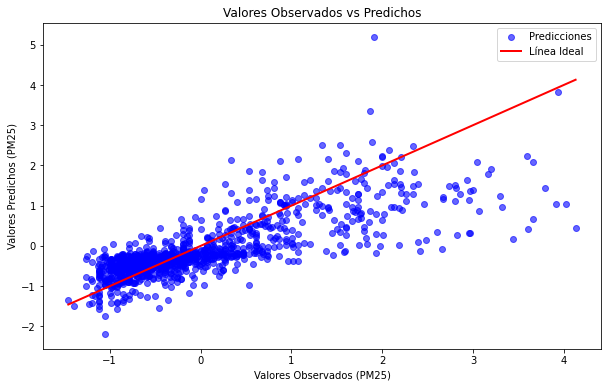

R^2: 0.5962819640281752
RMSE: 0.63538809870175


In [15]:
# se debe estandarizar los datos
#Regresion lineal simple pero con correccion por RH
# df = data = pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/dataset/proceed/merge_pm-maiac-meteo/1000/08-TOT_merge_PM25-MAIAC-Meteo.csv") 
# df['AOD_550_HR'] = df['AOD_550'] * (1/(1- (df['humedad']/100)))
# df = df.drop(columns = ["estacion_num"], inplace=False)
# # Definir las variables predictoras y la variable objetivo
# X = df[['AOD_550_HR']]#, 'temperatura', 'humedad', 'dirViento', 'velViento']]
# y = df[['PM25']]


import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/dataset/proceed/merge_superf_sat/02_data_proceed_OHG.csv")

# Calcular AOD_550_HR
df['AOD_550_HR'] = df['AOD_550'] * (1/(1 - (df['humedad'] / 100)))

# Variables independientes y dependientes
X = df[['AOD_550', "blh_mean", 'sp_mean', 'd2m_mean', 'v10_mean', 'u10_mean', 't2m_mean']]  
y = df['PM25']

# Estandarizar los datos
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # Corregir la dimensión de y

# Crear y ajustar el modelo
model = SVR(kernel='poly')  
model.fit(X, y)

# Predecir los valores
y_pred = model.predict(X)

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Línea Ideal')
plt.xlabel('Valores Observados (PM25)')
plt.ylabel('Valores Predichos (PM25)')
plt.title('Valores Observados vs Predichos')
plt.legend()
plt.show()

# Calcular R^2
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

ValueError: x and y must be the same size

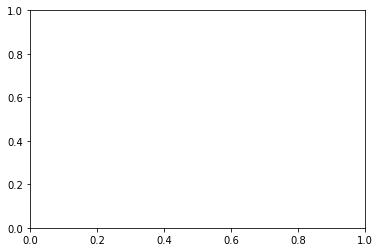

In [16]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y))
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(model.predict(X)),color="red")
plt.show()

In [33]:
# COMO ESTAN TRANSFORMADOS LOS VALORES
predicted_value = model.predict(sc_X.transform([[2.5]]))
#creo un objeto para hacer lo contrario
predict = sc_y.inverse_transform(predicted_value.reshape(-1,1))
predict

array([[31.26343782]])

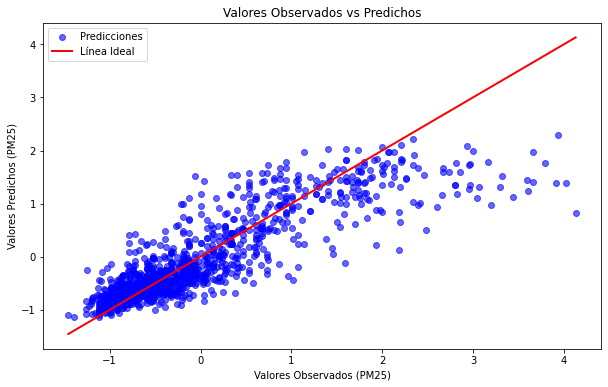

R^2: 0.73765756118389
RMSE: 0.5121937512466449


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/dataset/proceed/merge_superf_sat/02_data_proceed_OHG.csv")

# Calcular AOD_550_HR
df['AOD_550_HR'] = df['AOD_550'] * (1/(1 - (df['humedad'] / 100)))

# Variables independientes y dependientes
X = df[['AOD_550', "blh_mean", 'sp_mean', 'd2m_mean', 'v10_mean', 'u10_mean', 't2m_mean']]  
y = df['PM25']

# Estandarizar los datos
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # Corregir la dimensión de y

# Crear y ajustar el modelo

model = SVR(kernel='rbf')  # Puedes cambiar el tipo de núcleo si lo deseas ('linear', 'poly', 'rbf', 'sigmoid')
model.fit(X, y)

# Predecir los valores
y_pred = model.predict(X)

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Línea Ideal')
plt.xlabel('Valores Observados (PM25)')
plt.ylabel('Valores Predichos (PM25)')
plt.title('Valores Observados vs Predichos')
plt.legend()
plt.show()

# Calcular R^2
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

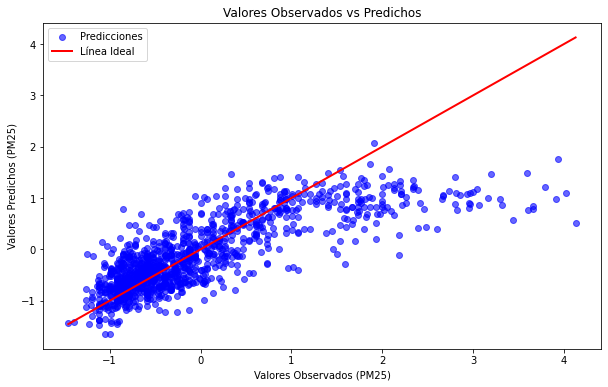

R^2: 0.6079836785667259
RMSE: 0.6261120677908022


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/dataset/proceed/merge_superf_sat/02_data_proceed_OHG.csv")

# Calcular AOD_550_HR
df['AOD_550_HR'] = df['AOD_550'] * (1/(1 - (df['humedad'] / 100)))

# Variables independientes y dependientes
X = df[['AOD_550', "blh_mean", 'sp_mean', 'd2m_mean', 'v10_mean', 'u10_mean', 't2m_mean']]  
y = df['PM25']

# Estandarizar los datos
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # Corregir la dimensión de y

# Crear y ajustar el modelo

model = SVR(kernel='linear')  # Puedes cambiar el tipo de núcleo si lo deseas ('linear', 'poly', 'rbf', 'sigmoid')
model.fit(X, y)

# Predecir los valores
y_pred = model.predict(X)

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Línea Ideal')
plt.xlabel('Valores Observados (PM25)')
plt.ylabel('Valores Predichos (PM25)')
plt.title('Valores Observados vs Predichos')
plt.legend()
plt.show()

# Calcular R^2
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

In [5]:
# Definir las variables predictoras y la variable objetivo
X = df[['AOD_550', 'temperatura', 'humedad', 'dirViento', 'velViento']]
y = df['PM25']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
# No transformamos y_test aún

# Crear y ajustar el modelo SVR
# SVR: Implementa el modelo de Support Vector Regression con un núcleo radial (RBF).
svr = SVR(kernel='rbf')  # Puedes cambiar el tipo de núcleo si lo deseas ('linear', 'poly', 'rbf', 'sigmoid')
svr.fit(X_train_scaled, y_train_scaled)

# Hacer predicciones
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Si necesitas ver algunas predicciones
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())

Mean Squared Error: 173.80635938904317
R^2 Score: 0.42295917449013143
       Actual  Predicted
1621     12.0  16.347875
9923     15.0  17.040045
10605    10.0  15.927307
11163    62.0  35.553827
5484     65.0  47.465853


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que 'df' ya está definido con las columnas necesarias
# X = df[['AOD_550', 'temperatura', 'humedad', 'dirViento', 'velViento']]
# y = df['PM25']
# Definir las variables predictoras y la variable objetivo
X = df[['AOD_550', 'temperatura', 'humedad', 'dirViento', 'velViento']]
y = df['PM25']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Definir el rango de hiperparámetros para la búsqueda
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'nu': [0.1, 0.5, 0.9],  # Solo para SVR con kernel 'nu'
    'epsilon': [0.1, 0.5, 1]  # Solo para SVR con kernel 'eps'
}

# Definir la validación cruzada y la búsqueda de hiperparámetros
grid_search_eps = GridSearchCV(SVR(kernel='linear'), param_grid, cv=10, scoring='r2')
grid_search_nu = GridSearchCV(SVR(kernel='linear'), param_grid, cv=10, scoring='r2')

# Ajustar el modelo con validación cruzada
grid_search_eps.fit(X_train_scaled, y_train)
grid_search_nu.fit(X_train_scaled, y_train)

# Imprimir los mejores parámetros para cada tipo de SVR
print(f"Mejores parámetros para SVR con epsilon: {grid_search_eps.best_params_}")
print(f"Mejores parámetros para SVR con nu: {grid_search_nu.best_params_}")

# Evaluar el modelo con el mejor conjunto de parámetros
best_model_eps = grid_search_eps.best_estimator_
best_model_nu = grid_search_nu.best_estimator_

# Predicciones y evaluación
y_pred_eps = best_model_eps.predict(X_test_scaled)
y_pred_nu = best_model_nu.predict(X_test_scaled)

mse_eps = mean_squared_error(y_test, y_pred_eps)
r2_eps = r2_score(y_test, y_pred_eps)

mse_nu = mean_squared_error(y_test, y_pred_nu)
r2_nu = r2_score(y_test, y_pred_nu)

print(f"SVR con epsilon - MSE: {mse_eps}, R^2: {r2_eps}")
print(f"SVR con nu - MSE: {mse_nu}, R^2: {r2_nu}")

# Comparar resultados
comparacion = pd.DataFrame({
    'Tipo SVR': ['Epsilon', 'Nu'],
    'MSE': [mse_eps, mse_nu],
    'R^2': [r2_eps, r2_nu]
})

print(comparacion)


ValueError: Invalid parameter nu for estimator SVR(C=0.1, degree=2, kernel='linear'). Check the list of available parameters with `estimator.get_params().keys()`.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, NuSVR
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que 'df' ya está definido con las columnas necesarias
X = df[['AOD_550', 'temperatura', 'humedad', 'dirViento', 'velViento']]
y = df['PM25']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Definir el rango de hiperparámetros para la búsqueda
param_grid_eps = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # Solo para kernel 'poly'
    'epsilon': [0.1, 0.5, 1]  # Solo para SVR con kernel 'eps'
}

param_grid_nu = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # Solo para kernel 'poly'
    'nu': [0.1, 0.5, 0.9]  # Solo para NuSVR
}

# GridSearchCV para SVR con 'epsilon'
grid_search_eps = GridSearchCV(SVR(), param_grid_eps, cv=5, scoring='r2', n_jobs=-1)# cv=10

# GridSearchCV para NuSVR
grid_search_nu = GridSearchCV(NuSVR(), param_grid_nu, cv=5, scoring='r2', n_jobs=-1) #cv=10

# Ajustar los modelos con validación cruzada
grid_search_eps.fit(X_train_scaled, y_train)
grid_search_nu.fit(X_train_scaled, y_train)

# Imprimir los mejores parámetros para cada tipo de SVR
print(f"Mejores parámetros para SVR con epsilon: {grid_search_eps.best_params_}")
print(f"Mejores parámetros para NuSVR: {grid_search_nu.best_params_}")

# Evaluar el modelo con el mejor conjunto de parámetros
best_model_eps = grid_search_eps.best_estimator_
best_model_nu = grid_search_nu.best_estimator_

# Predicciones y evaluación
y_pred_eps = best_model_eps.predict(X_test_scaled)
y_pred_nu = best_model_nu.predict(X_test_scaled)

mse_eps = mean_squared_error(y_test, y_pred_eps)
r2_eps = r2_score(y_test, y_pred_eps)

mse_nu = mean_squared_error(y_test, y_pred_nu)
r2_nu = r2_score(y_test, y_pred_nu)

print(f"SVR con epsilon - MSE: {mse_eps}, R^2: {r2_eps}")
print(f"NuSVR - MSE: {mse_nu}, R^2: {r2_nu}")

# Comparar resultados
comparacion = pd.DataFrame({
    'Tipo SVR': ['Epsilon', 'Nu'],
    'MSE': [mse_eps, mse_nu],
    'R^2': [r2_eps, r2_nu]
})

print(comparacion)


KeyboardInterrupt: 

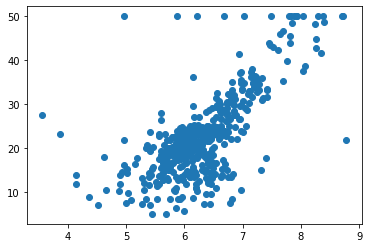

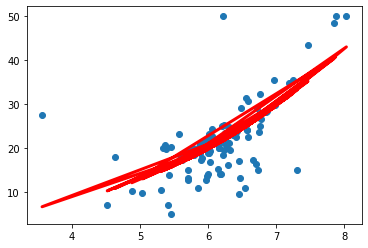

Precision del modelo
0.5400164454210985
Intercept: [3.15561375]


AttributeError: coef_ is only available when using a linear kernel

In [53]:
from sklearn import datasets
boston = datasets.load_boston()
# print(boston)
# seleccionamos las x e y
X_svr = boston.data[:, np.newaxis,5]
y_svr = boston.target

#Grafcar
plt.scatter(X_svr, y_svr)
plt.show()
#Separamos en set de datos de prueba y test
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_svr, y_svr, test_size=0.2, random_state=42)

#Definir el modelo
# C constante en la formula, si ponemos un c muy bajo va a ceptar muhcos errores
#epsilon: variable que controla el error cometido por la funcion de regrision
# al aproximar a las bandas
# svr = SVR(kernel ="linear", C=1.0, epsilon=0.2)
#  'kernel': ['linear', 'rbf', 'poly'],
svr = SVR(kernel ="poly", C=1.0, epsilon=0.2)
#Enterno el algoritmo
svr.fit(X_train, y_train)

#Realizo una prediccion
y_pred =svr.predict(X_test)

#Graficamos los datos junto con el modelo

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.show()

# metricas, presicion del modelo
print("Precision del modelo")
print(svr.score(X_train, y_train))

# Coeficientes del modelo
print('Intercept:', svr.intercept_)
print('Coefficient:', svr.coef_[0])

https://www.youtube.com/watch?v=WtxqqVuwd1w

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Creando un DataFrame de ejemplo
data = {
    'temperatura': [22.1, 23.5, 21.6, 19.8, 24.3, 25.1, 18.7, 20.5, 23.0, 21.2],
    'humedad': [55, 60, 58, 63, 59, 57, 62, 61, 56, 54],
    'velocidad_viento': [3.1, 3.6, 2.9, 3.3, 3.5, 3.7, 2.8, 3.2, 3.4, 3.0],
    'PM2.5': [35, 42, 37, 50, 44, 38, 55, 48, 40, 36]
}

df = pd.DataFrame(data)
# Separar las características (variables predictoras) y la variable objetivo
X = df[['temperatura', 'humedad', 'velocidad_viento']]
y = df['PM2.5']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo SVR con un kernel RBF
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred = svr.predict(X_test_scaled)

# Evaluar el modelo usando el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Nuevos datos para predecir
X_new = np.array([[21.0, 59, 3.2], [22.5, 57, 3.3]])

# Normalizar los nuevos datos usando el mismo escalador
X_new_scaled = scaler.transform(X_new)

# Hacer predicciones con el modelo entrenado
predicciones = svr.predict(X_new_scaled)

print("Predicciones de PM2.5 para los nuevos datos:", predicciones)

Error cuadrático medio: 0.13327289192475625


In [3]:
# Nuevos datos para predecir
X_new = np.array([[21.0, 59, 3.2], [22.5, 57, 3.3]])

# Normalizar los nuevos datos usando el mismo escalador
X_new_scaled = scaler.transform(X_new)

# Hacer predicciones con el modelo entrenado
predicciones = svr.predict(X_new_scaled)

print("Predicciones de PM2.5 para los nuevos datos:", predicciones)


Predicciones de PM2.5 para los nuevos datos: [41.39720415 40.32093275]
